In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
import numpy as np

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["trust_analysis_db"]
collection = db["merged_trust_population"]

In [14]:
# fetching data from db and converting to df
cursor = collection.find()
data = pd.DataFrame(list(cursor))
data.drop(columns=['_id'], inplace=True)
print(data.head())

         country  doctor_and_nurses  government  journalist  neighbourhood  \
0          China              90.86       56.93       74.62          88.08   
1          India              85.67       74.18       69.12          68.36   
2  United States              96.69       53.49       58.78          89.70   
3      Indonesia              81.09       70.82       63.41          80.38   
4        Nigeria              64.21       21.11       37.00          42.47   

   philantropist    population  scientist  traditional_healers  
0          73.24  1.426106e+09      96.57                92.47  
1          65.68  1.402618e+09      85.30                38.20  
2          88.25  3.315269e+08      93.66                64.67  
3          58.64  2.748149e+08      70.11                66.59  
4          44.08  2.139962e+08      47.41                35.11  


In [26]:
#making sure columns are float and rounded to 2 decimals
trust_columns = [
    'neighbourhood', 
    'government', 
    'scientist', 
    'journalist', 
    'doctor_and_nurses', 
    'philantropist', 
    'traditional_healers'
]
top_50_countries = data.nlargest(50, "population")
top_50_countries.head()
bottom_50_countries = data.nsmallest(50, "population")
#bottom_50_countries.head()
top_50_countries.head(8)

,country,doctor_and_nurses,government,journalist,neighbourhood,philantropist,population,scientist,traditional_healers
0,China,90.86,56.93,74.62,88.08,73.24,1.426106e+09,96.57,92.47
1,India,85.67,74.18,69.12,68.36,65.68,1.402618e+09,85.30,38.20
2,United States,96.69,53.49,58.78,89.70,88.25,3.315269e+08,93.66,64.67
3,Indonesia,81.09,70.82,63.41,80.38,58.64,2.748149e+08,70.11,66.59
4,Nigeria,64.21,21.11,37.00,42.47,44.08,2.139962e+08,47.41,35.11
5,Brazil,84.87,42.98,56.36,53.58,65.22,2.086608e+08,79.73,26.95
6,Bangladesh,88.87,88.39,71.72,86.78,75.47,1.662980e+08,87.31,14.65
7,Russia,69.66,46.14,32.39,76.00,63.33,1.452451e+08,85.55,10.95


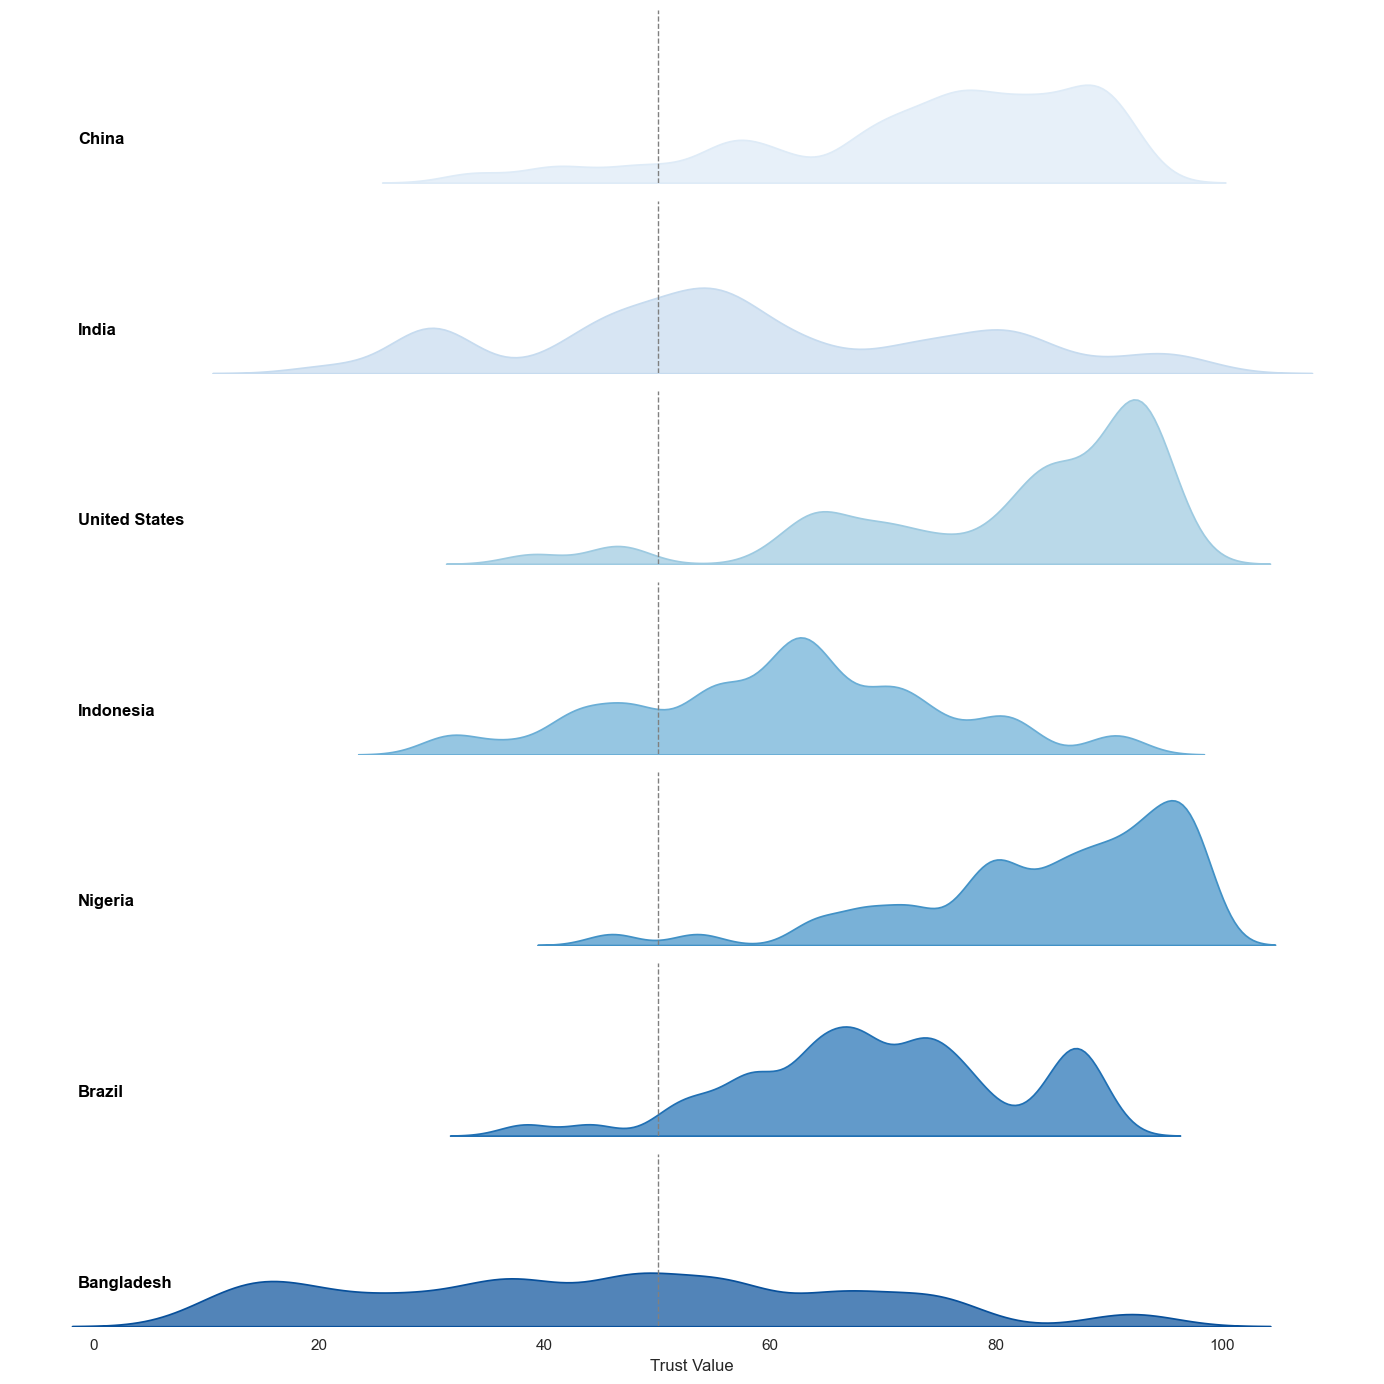

In [50]:
# Reshape the data for visualization
melted_data = top_50_countries.melt(
    id_vars=["country"], 
    value_vars=[
        'neighbourhood', 
        'government', 
        'scientist', 
        'journalist', 
        'doctor_and_nurses', 
        'philantropist', 
        'traditional_healers'
    ], 
    var_name="trust_type", 
    value_name="trust_value"
)

# Set up Seaborn's theme for a Ridge Plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the Ridge Plot
g = sns.FacetGrid(
    melted_data, 
    row="trust_type", 
    hue="trust_type", 
    aspect=7, 
    height=2, 
    palette="Blues"
)



# Map the KDE plot with adjusted bandwidth
g.map(
    sns.kdeplot, 
    "trust_value", 
    fill=True, 
    alpha=0.7, 
    linewidth=1.25,
    bw_adjust=0.4  # Adjust bandwidth to smooth the KDE
)

# Add a vertical reference line at x=50 for each subplot
for ax in g.axes.flat:
    ax.axvline(50, linestyle="--", color="gray", linewidth=1)

# Add jitter to the data to separate countries horizontally (optional)
melted_data['trust_value_jittered'] = melted_data['trust_value'] + np.random.uniform(-0.1, 0.1, size=len(melted_data))

# Optional: Only use jitter for better spacing if necessary
# g.map(
#     sns.kdeplot, 
#     "trust_value_jittered", 
#     fill=True, 
#     alpha=0.7, 
#     linewidth=1.5,
#     bw_adjust=1.5  # Adjust bandwidth to smooth the KDE
# )

# Add country names to the plot
for ax, country in zip(g.axes.flat, melted_data['country'].unique()):
    ax.text(
        0.05, 0.25, country,  # Adjust x position to be closer to the left edge (0.05 instead of 0.5)
        ha="left", va="center", 
        transform=ax.transAxes, 
        fontsize=12, color='black', weight='bold'
    )

# Adjust the aesthetics of the Ridge Plot
g.fig.subplots_adjust(hspace=-0.1)
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Trust Value")
g.despine(bottom=True, left=True)

# Automatically adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


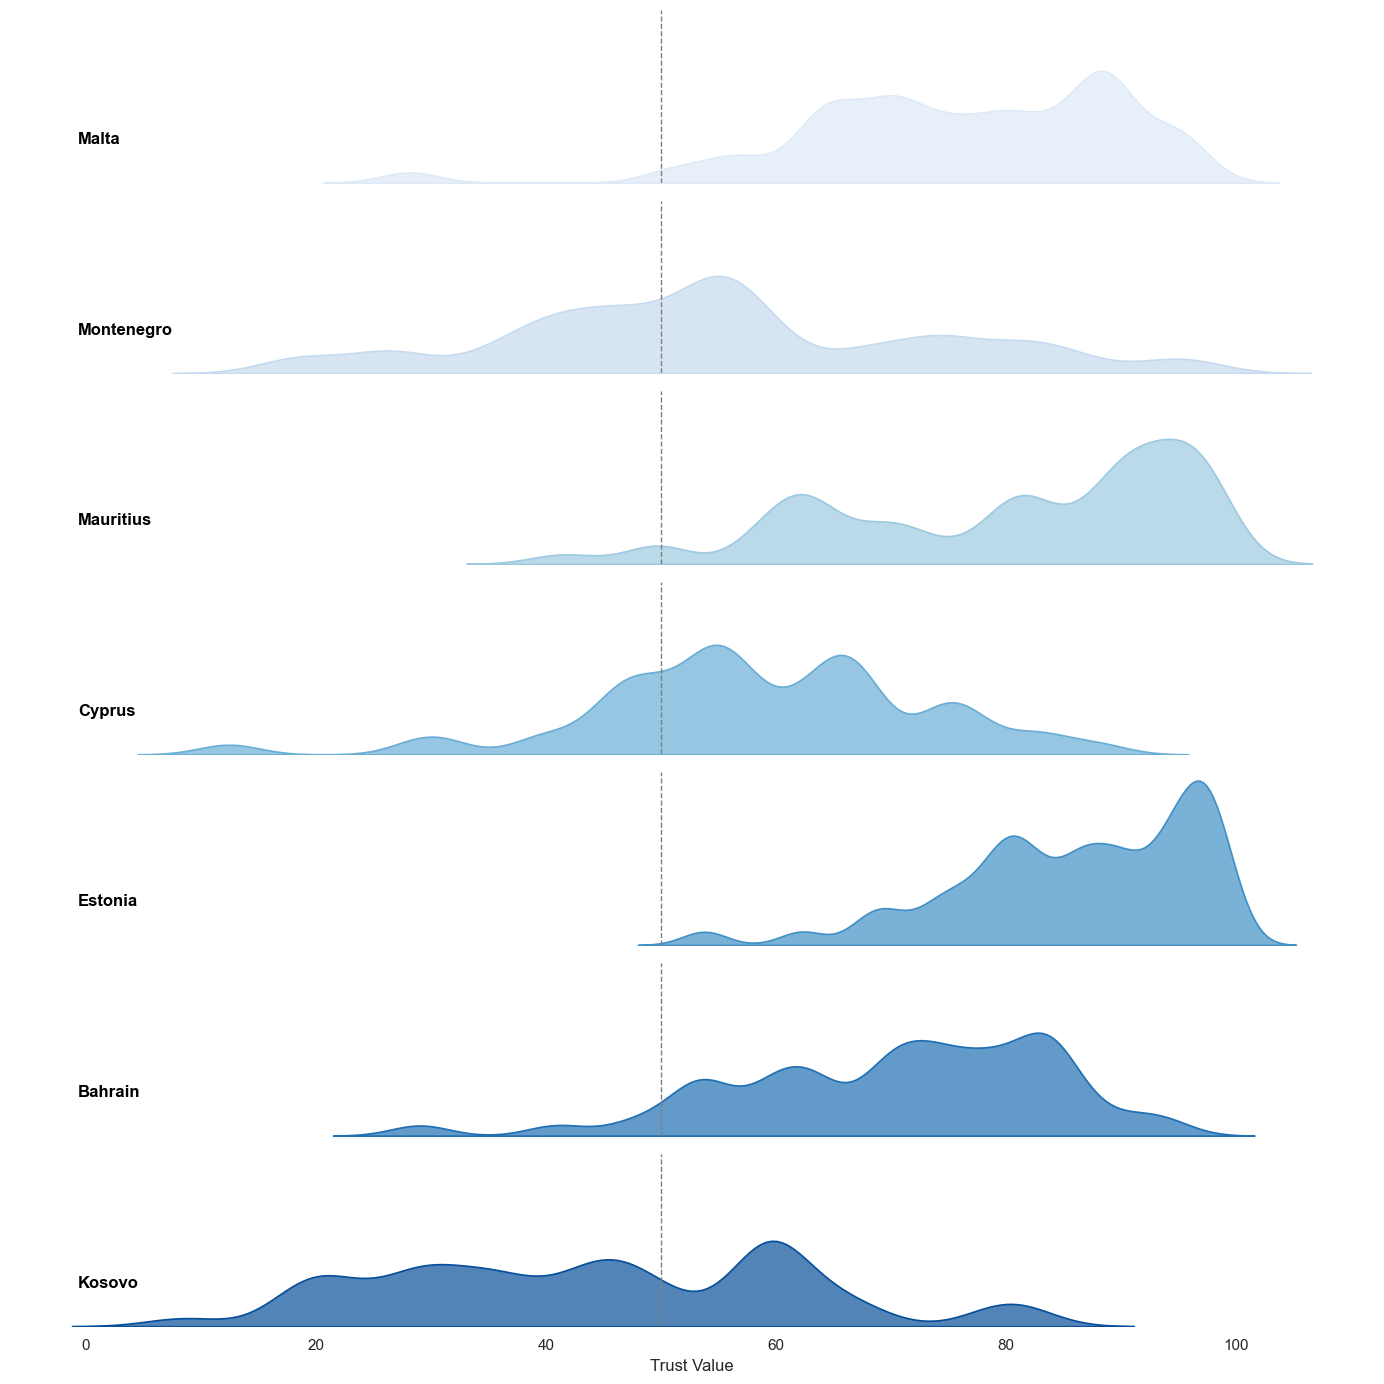

In [51]:
# Reshape the data for visualization
melted_data = bottom_50_countries.melt(
    id_vars=["country"], 
    value_vars=[
        'neighbourhood', 
        'government', 
        'scientist', 
        'journalist', 
        'doctor_and_nurses', 
        'philantropist', 
        'traditional_healers'
    ], 
    var_name="trust_type", 
    value_name="trust_value"
)

# Set up Seaborn's theme for a Ridge Plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the Ridge Plot
g = sns.FacetGrid(
    melted_data, 
    row="trust_type", 
    hue="trust_type", 
    aspect=7, 
    height=2, 
    palette="Blues"
)



# Map the KDE plot with adjusted bandwidth
g.map(
    sns.kdeplot, 
    "trust_value", 
    fill=True, 
    alpha=0.7, 
    linewidth=1.25,
    bw_adjust=0.4  # Adjust bandwidth to smooth the KDE
)

# Add a vertical reference line at x=50 for each subplot
for ax in g.axes.flat:
    ax.axvline(50, linestyle="--", color="gray", linewidth=1)

# Add jitter to the data to separate countries horizontally (optional)
melted_data['trust_value_jittered'] = melted_data['trust_value'] + np.random.uniform(-0.1, 0.1, size=len(melted_data))

# Optional: Only use jitter for better spacing if necessary
# g.map(
#     sns.kdeplot, 
#     "trust_value_jittered", 
#     fill=True, 
#     alpha=0.7, 
#     linewidth=1.5,
#     bw_adjust=1.5  # Adjust bandwidth to smooth the KDE
# )

# Add country names to the plot
for ax, country in zip(g.axes.flat, melted_data['country'].unique()):
    ax.text(
        0.05, 0.25, country,  # Adjust x position to be closer to the left edge (0.05 instead of 0.5)
        ha="left", va="center", 
        transform=ax.transAxes, 
        fontsize=12, color='black', weight='bold'
    )

# Adjust the aesthetics of the Ridge Plot
g.fig.subplots_adjust(hspace=-0.1)
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Trust Value")
g.despine(bottom=True, left=True)

# Automatically adjust the layout
plt.tight_layout()

# Display the plot
plt.show()
